# Milestone 4
### Abhisek Sarkar

In [1]:
# Import libraries
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization (plotting)
import warnings

# Suppress warnings (optional, comment out if needed)
warnings.filterwarnings('ignore')  # This can hide potential issues, use with caution

# Read data from CSV file
data = pd.read_csv("/home/abhisek001/Infosys Project/Healthcare Providers.csv")

# Preview the first few rows of the data
data.head()


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [2]:
# Print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [3]:
# Define a list of irrelevant columns for the current analysis
irrelevant_columns = [
    'Entity Type of the Provider',  # Not relevant to this specific analysis
    'Street Address 1 of the Provider',  # Not required for this task
    'Street Address 2 of the Provider',  # Not necessary for this analysis
    'Zip Code of the Provider',        # Not relevant to the current focus
    'Medicare Participation Indicator',  # Not considered in this analysis
    'Place of Service',                # Excluded from the scope of this analysis
    'HCPCS Code',                       # Not relevant to this specific task
    'HCPCS Description',                # Not required for this analysis
    'HCPCS Drug Indicator',             # Excluded from the scope of this analysis
    'Country Code of the Provider'     # Not relevant to this specific analysis
]

# Drop the irrelevant columns from the data
data = data.drop(columns=irrelevant_columns)


Columns that have no relevance in our assignment have been dropped

In [4]:
# Print the first few rows of the data
print(data.head())

     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                     

<h2>Data Preprocessing </h2>

In [5]:
# Merging the name columns into a single column 'Full Name'
data['Full Name'] = (
    data['First Name of the Provider'].fillna('') + ' ' +  # Add 'First Name' with space
    data['Middle Initial of the Provider'].fillna('') + ' ' +  # Add 'Middle Initial' with space
    data['Last Name/Organization Name of the Provider'].fillna('')  # Add 'Last Name'
)

# Remove trailing/leading spaces from 'Full Name'
data['Full Name'] = data['Full Name'].str.strip()

# Drop the original name columns as they are no longer needed
data = data.drop(columns=[
    'Last Name/Organization Name of the Provider',
    'First Name of the Provider',
    'Middle Initial of the Provider'
])

# Extract 'Full Name' column for easier manipulation
full_name_column = data.pop('Full Name')

# Insert 'Full Name' column back into the DataFrame at index 1 (second position)
data.insert(1, 'Full Name', full_name_column)

# Display the first few rows of the modified DataFrame to see the changes
data.head()


,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


A new column "Full Name" has been created to merge first name, middle name and last name

In [6]:
# Uniform format of credentials
# This line removes all periods (.) from the 'Credentials of the Provider' column
# and converts the resulting string to uppercase. This ensures a consistent format
# for credentials across all entries in the data.
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()

# Display the first few rows of the data to verify the changes
data.head()


,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


"Credentials of the Provider" column now follows a uniform format. Such that MD and M.D and M.D. are all treated as the same unit

<h2>Converting Object to Numeric Type </h2>

In [7]:
# List of column names containing numeric data
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert numeric columns to numeric data type (float)
# Handling potential conversion errors by setting errors='coerce'
# (coerce non-numeric values to NaN)
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Print information about the DataFrame, including data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               92791 non-null   object 
 4   Gender of the Provider                                    95746 non-null   object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

<h2>Looking for Missing Values and imputing them with Mean </h2>

In [8]:
# Check for missing values in the data
print(data.isnull().sum())


index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                          2653
Number of Medicare Beneficiaries                             405
Number of Distinct Medicare Beneficiary/Per Day Services    1500
Average Medicare Allowed Amount                              745
Average Submitted Charge Amount                             6723
Average Medicare Payment Amount                              466
Average Medicare Standardized Amount                         470
dtype: int64


In [9]:
# Impute numeric missing values with the mean of each column
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean(), inplace=True)

# Print the remaining number of missing values (all columns)
print(data.isnull().sum())


index                                                            0
Full Name                                                        0
National Provider Identifier                                     0
Credentials of the Provider                                   7209
Gender of the Provider                                        4254
City of the Provider                                             0
State Code of the Provider                                       0
Provider Type                                                    0
Number of Services                                          100000
Number of Medicare Beneficiaries                            100000
Number of Distinct Medicare Beneficiary/Per Day Services    100000
Average Medicare Allowed Amount                             100000
Average Submitted Charge Amount                             100000
Average Medicare Payment Amount                             100000
Average Medicare Standardized Amount                        10

<h2>Imputation of categorical columns with mode</h2>

In [10]:
# Define a list of categorical columns for efficient filtering
categorical_columns = ['Credentials of the Provider',
                       'Gender of the Provider',
                       'City of the Provider',
                       'State Code of the Provider']

# Impute missing values in categorical columns with the mode
for column in categorical_columns:
    # Check if there are missing values before applying mode to avoid unnecessary calculations
    if data[column].isnull().any():
        # Fill NaN values with the most frequent category (mode)
        data[column].fillna(data[column].mode()[0], inplace=True)
        print(f"Imputed missing values in '{column}' with the mode.")

# Print the total number of missing values (after imputation)
print(data.isnull().sum())



Imputed missing values in 'Credentials of the Provider' with the mode.
Imputed missing values in 'Gender of the Provider' with the mode.
index                                                            0
Full Name                                                        0
National Provider Identifier                                     0
Credentials of the Provider                                      0
Gender of the Provider                                           0
City of the Provider                                             0
State Code of the Provider                                       0
Provider Type                                                    0
Number of Services                                          100000
Number of Medicare Beneficiaries                            100000
Number of Distinct Medicare Beneficiary/Per Day Services    100000
Average Medicare Allowed Amount                             100000
Average Submitted Charge Amount                            

<h2>Looking for Duplicate Values </h2>

In [11]:
# Check for duplicates
print(data.duplicated().sum())


0


In [12]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,None,None,None,None,None,None,None
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,None,None,None,None,None,None,None
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,None,None,None,None,None,None,None
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,None,None,None,None,None,None,None
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,None,None,None,None,None,None,None


<h2>Encoding some Categorical Columns using Frequency Encoder</h2>

In [13]:
def frequency_encode(df, columns):
    for column in columns:
        freq_encoding = df[column].value_counts() / len(df)
        new_column_name = column + '_Freq'
        df.insert(df.columns.get_loc(column) + 1, new_column_name, df[column].map(freq_encoding))
    return df

columns_to_encode=['Credentials of the Provider',
                   'Gender of the Provider',
                   'Provider Type',
                  'State Code of the Provider']

data = frequency_encode(data, columns_to_encode)

df=data

data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.73827,F,0.29105,SAINT LOUIS,MO,0.01997,Internal Medicine,0.11366,None,None,None,None,None,None,None
1,3354385,WENDY P JONES,1346202256,MD,0.73827,F,0.29105,FAYETTEVILLE,NC,0.03725,Obstetrics & Gynecology,0.01028,None,None,None,None,None,None,None
2,3001884,RICHARD W DUROCHER,1306820956,DPM,0.01915,M,0.70895,NORTH HAVEN,CT,0.01403,Podiatry,0.02027,None,None,None,None,None,None,None
3,7594822,JASPER FULLARD,1770523540,MD,0.73827,M,0.70895,KANSAS CITY,MO,0.01997,Internal Medicine,0.11366,None,None,None,None,None,None,None
4,746159,ANTHONY E PERROTTI,1073627758,DO,0.06176,M,0.70895,JUPITER,FL,0.07263,Internal Medicine,0.11366,None,None,None,None,None,None,None


In [14]:
df.columns

Index(['index', 'Full Name', 'National Provider Identifier',
       'Credentials of the Provider', 'Credentials of the Provider_Freq',
       'Gender of the Provider', 'Gender of the Provider_Freq',
       'City of the Provider', 'State Code of the Provider',
       'State Code of the Provider_Freq', 'Provider Type',
       'Provider Type_Freq', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

<h2>Performing Standardization on Numerical Columns</h2>

In [15]:
from sklearn.preprocessing import StandardScaler

data_copy=data.copy()

standardization_columns=['Number of Services',
                         'Number of Medicare Beneficiaries',
                         'Number of Distinct Medicare Beneficiary/Per Day Services',
                         'Average Medicare Allowed Amount',
                         'Average Submitted Charge Amount',
                         'Average Medicare Payment Amount',
                         'Average Medicare Standardized Amount',
                         'Credentials of the Provider_Freq',
                         'Gender of the Provider_Freq',
                         'State Code of the Provider_Freq' ]

# Standardization
standard_scaler = StandardScaler()
data[standardization_columns] = standard_scaler.fit_transform(data[standardization_columns])



print("Standardized DataFrame:")
data.head()

Standardized DataFrame:


,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.594983,F,-1.560716,SAINT LOUIS,MO,-0.737342,Internal Medicine,0.11366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3354385,WENDY P JONES,1346202256,MD,0.594983,F,-1.560716,FAYETTEVILLE,NC,-0.004973,Obstetrics & Gynecology,0.01028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3001884,RICHARD W DUROCHER,1306820956,DPM,-1.684316,M,0.640731,NORTH HAVEN,CT,-0.989093,Podiatry,0.02027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7594822,JASPER FULLARD,1770523540,MD,0.594983,M,0.640731,KANSAS CITY,MO,-0.737342,Internal Medicine,0.11366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,746159,ANTHONY E PERROTTI,1073627758,DO,-1.549260,M,0.640731,JUPITER,FL,1.494517,Internal Medicine,0.11366,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<H2>FINAL DATASET </H2>

In [16]:

anomaly_detection_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Credentials of the Provider_Freq',
    'Gender of the Provider_Freq',
    'State Code of the Provider_Freq', 
    'Provider Type_Freq'
]

X = data[anomaly_detection_columns]

X

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Credentials of the Provider_Freq,Gender of the Provider_Freq,State Code of the Provider_Freq,Provider Type_Freq
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594983,-1.560716,-0.737342,0.11366
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594983,-1.560716,-0.004973,0.01028
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.684316,0.640731,-0.989093,0.02027
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594983,0.640731,-0.737342,0.11366
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.549260,0.640731,1.494517,0.11366
...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.709831,-1.560716,0.142517,0.02780
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.729577,-1.560716,-1.140399,0.05713
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594983,0.640731,-0.737342,0.04602
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594983,-1.560716,1.112228,0.11366


---

<br>

<H2>Using Auto Encoders</H2>

<H3>Autoencoders can be a powerful tool for anomaly detection</H3>

In [17]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, Dense

# Skip scaling if data is already standardized
X_scaled = X  # Assuming X is already standardized

# Define the Autoencoder Model
input_dim = X_scaled.shape[1]  # Get the input dimension from the data
encoding_dim = 11  # Number of latent variables (features) in encoded representation

# Define the model architecture
input_layer = Input(shape=(input_dim,))  # Input layer with dimension of the data
encoded = Dense(encoding_dim, activation='relu')(input_layer)  # Encoder with ReLU activation
decoded = Dense(input_dim, activation='sigmoid')(encoded)  # Decoder with sigmoid activation for reconstruction

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model with Adam optimizer and mean squared error loss
autoencoder.compile(optimizer='adam', loss='mean_squared_error')



2024-07-18 17:25:15.065832: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 17:25:15.168046: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 17:25:15.210993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 17:25:15.224759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 17:25:15.300612: I tensorflow/core/platform/cpu_feature_guar

In [18]:
from sklearn.preprocessing import StandardScaler  # Import for data scaling
from sklearn.metrics import mean_squared_error  # Import for error calculation
from keras.models import Model  # Import for building the autoencoder model
from keras.layers import Input, Dense  # Imports for creating layers

# Standardize the input data (optional but recommended)
X_scaled = StandardScaler().fit_transform(X)  # Assuming X is your input data

# Define the latent dimension (number of bottleneck neurons)
encoding_dim = 32  # Adjust this value based on your data and desired compression

# Model definition
input_layer = Input(shape=(X_scaled.shape[1],))  # Input layer with feature dimension

# Encoding layers (bottleneck towards latent representation)
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Latent representation

# Decoding layers (reconstruction from latent representation)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(X_scaled.shape[1], activation='sigmoid')(decoded)  # Output layer with same dimension as input

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model for training
autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [19]:
# Print a summary of the autoencoder model
print("Autoencoder Model Summary:")
autoencoder.summary()


Autoencoder Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,787 (30.42 KB)

 Trainable params: 7,787 (30.42 KB)

 Non-trainable params: 0 (0.00 B)

### Interpretation of Model Architecture

**Model:** functional_7

This is an autoencoder model with the following architecture:

* **Input Layer:** The model takes data with **11 features** as input.
* **Dense Layers:**
    * The model uses a series of **fully-connected (dense)** layers for encoding and decoding.
    * **Encoding Layers:**  
        - The first layer has **64 units** and **768 parameters**.
        - The number of units progressively reduces through subsequent layers: **32 units** (2,080 parameters), **16 units** (528 parameters), and finally **11 units** (187 parameters). This captures a compressed representation of the input data.
    * **Decoding Layers:**
        - The decoding process mirrors the encoding structure, gradually increasing the number of units: **16 units** (192 parameters), **32 units** (544 parameters), **64 units** (2,112 parameters).
        - The final layer has **11 units** (715 parameters), matching the original input dimension. 
* **Total Parameters:** The model has a total of **7,126 trainable parameters**.

**Functionality:**

The autoencoder is designed to learn a compressed representation of the input data. The encoding layers extract important features by reducing dimensionality. The decoding layers then attempt to reconstruct the original data from this compressed representation. This process helps the model identify underlying patterns and anomalies in the data.

This interpretation clarifies the terminology (fully-connected for dense) and emphasizes the functionality of encoding and decoding layers. It also improves readability by separating the description of individual layers and the overall function. 

In [20]:
# Import TensorFlow library
import tensorflow as tf

# Define path to save the model plot image
plot_path = 'model.png'

# Generate a visual representation of the autoencoder model architecture
# - Omitting 'show_shapes' and 'show_dtype' as they clutter the plot for this case
# - Omitting 'show_layer_names' for a cleaner visual overview (layer names can be inspected in code)
# - Setting 'rankdir' to 'TB' for top-to-bottom layout (alternative is 'LR' for left-to-right)
# - Disabling 'expand_nested' to avoid expanding groups (relevant for complex models)
# - Setting 'dpi' to 200 for higher image resolution
# - Disabling 'show_layer_activations' and 'show_trainable' as they add extra information (can be enabled if needed)
tf.keras.utils.plot_model(
    autoencoder,
    to_file=plot_path,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=False,
    show_trainable=False
)

# Import IPython.display library (assuming you're using a Jupyter Notebook)
from IPython.display import Image

# Display the generated model plot image
Image(filename=plot_path)


AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
import numpy as np
import pandas as pd
# Train the Autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)


Epoch 1/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 947us/step - loss: nan - val_loss: nan
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: nan - val_loss: nan
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: nan - val_loss: nan
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: nan - val_loss: nan
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: nan - val_loss: nan
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: nan - val_loss: nan
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: nan - val_loss: nan
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: nan - val_loss: nan
Epoch 9/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: nan - val_loss: nan
Epoch 10/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: nan - val_loss: nan
Epoch 11/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 999us/step - loss: nan - val_loss: nan
Epoch 12/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step - loss: nan - val_loss: nan
Epoch 1

In [ ]:
# Reconstruct the Data and Calculate Reconstruction Error
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# Detect Anomalies Based on Reconstruction Error
threshold = np.percentile(reconstruction_errors, 99)  # Set threshold at 99 percentile
data['Autoencoder_Anomaly'] = (reconstruction_errors > threshold).astype(int)

# Identify anomalies
anomalies = reconstruction_errors > threshold
num_anomalies = np.sum(anomalies)

print(f'Number of anomalies: {num_anomalies}')


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 506us/step
Number of anomalies: 1000


### Model Training and Anomaly Detection Results

**Training Progress:**
- **Epochs Completed:** 3125

**Anomaly Detection:**
- **Number of Anomalies Detected:** 1000


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 513us/step
Number of anomalies: 1000


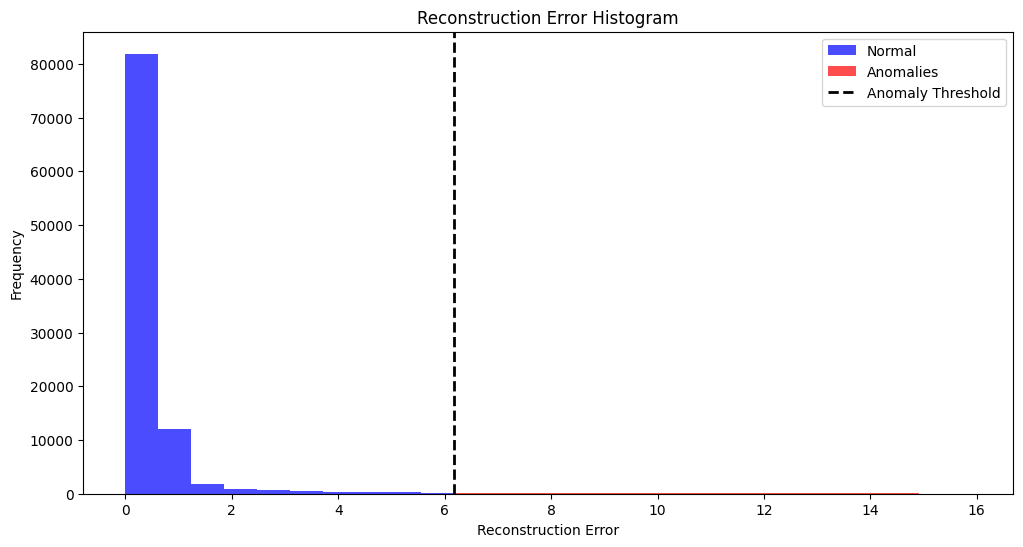

In [ ]:
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# Detect Anomalies Based on Reconstruction Error
threshold = np.percentile(reconstruction_errors, 99)  # Set threshold at 99 percentile
data['Autoencoder_Anomaly'] = (reconstruction_errors > threshold).astype(int)

# Identify anomalies
anomalies = reconstruction_errors > threshold
num_anomalies = np.sum(anomalies)

print(f'Number of anomalies: {num_anomalies}')

# Plot the Reconstruction Error Histogram
plt.figure(figsize=(12, 6))
plt.hist(reconstruction_errors[~anomalies], bins=10, color='blue', alpha=0.7, label='Normal')
plt.hist(reconstruction_errors[anomalies], bins=10, color='red', alpha=0.7, label='Anomalies')
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=2, label='Anomaly Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Histogram')
plt.legend()
plt.show()

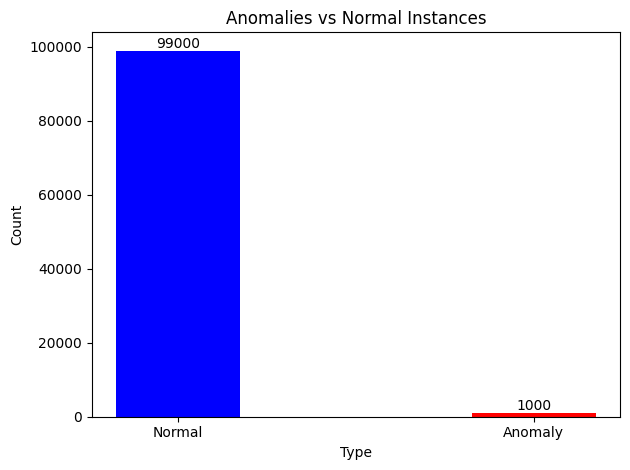

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

threshold = np.percentile(reconstruction_errors, 99)
anomalies = reconstruction_errors > threshold

# Bar Graph for anomalies vs. normal instances
normal_count = sum(~anomalies)
anomaly_count = sum(anomalies)
    
bar_width = 0.35
index = np.arange(2)
    
bars = plt.bar(index, [normal_count, anomaly_count], bar_width, color=['blue', 'red'])
plt.title('Anomalies vs Normal Instances')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(index, ['Normal', 'Anomaly'])

# counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


 **Number of Anomalies Detected:** 1000


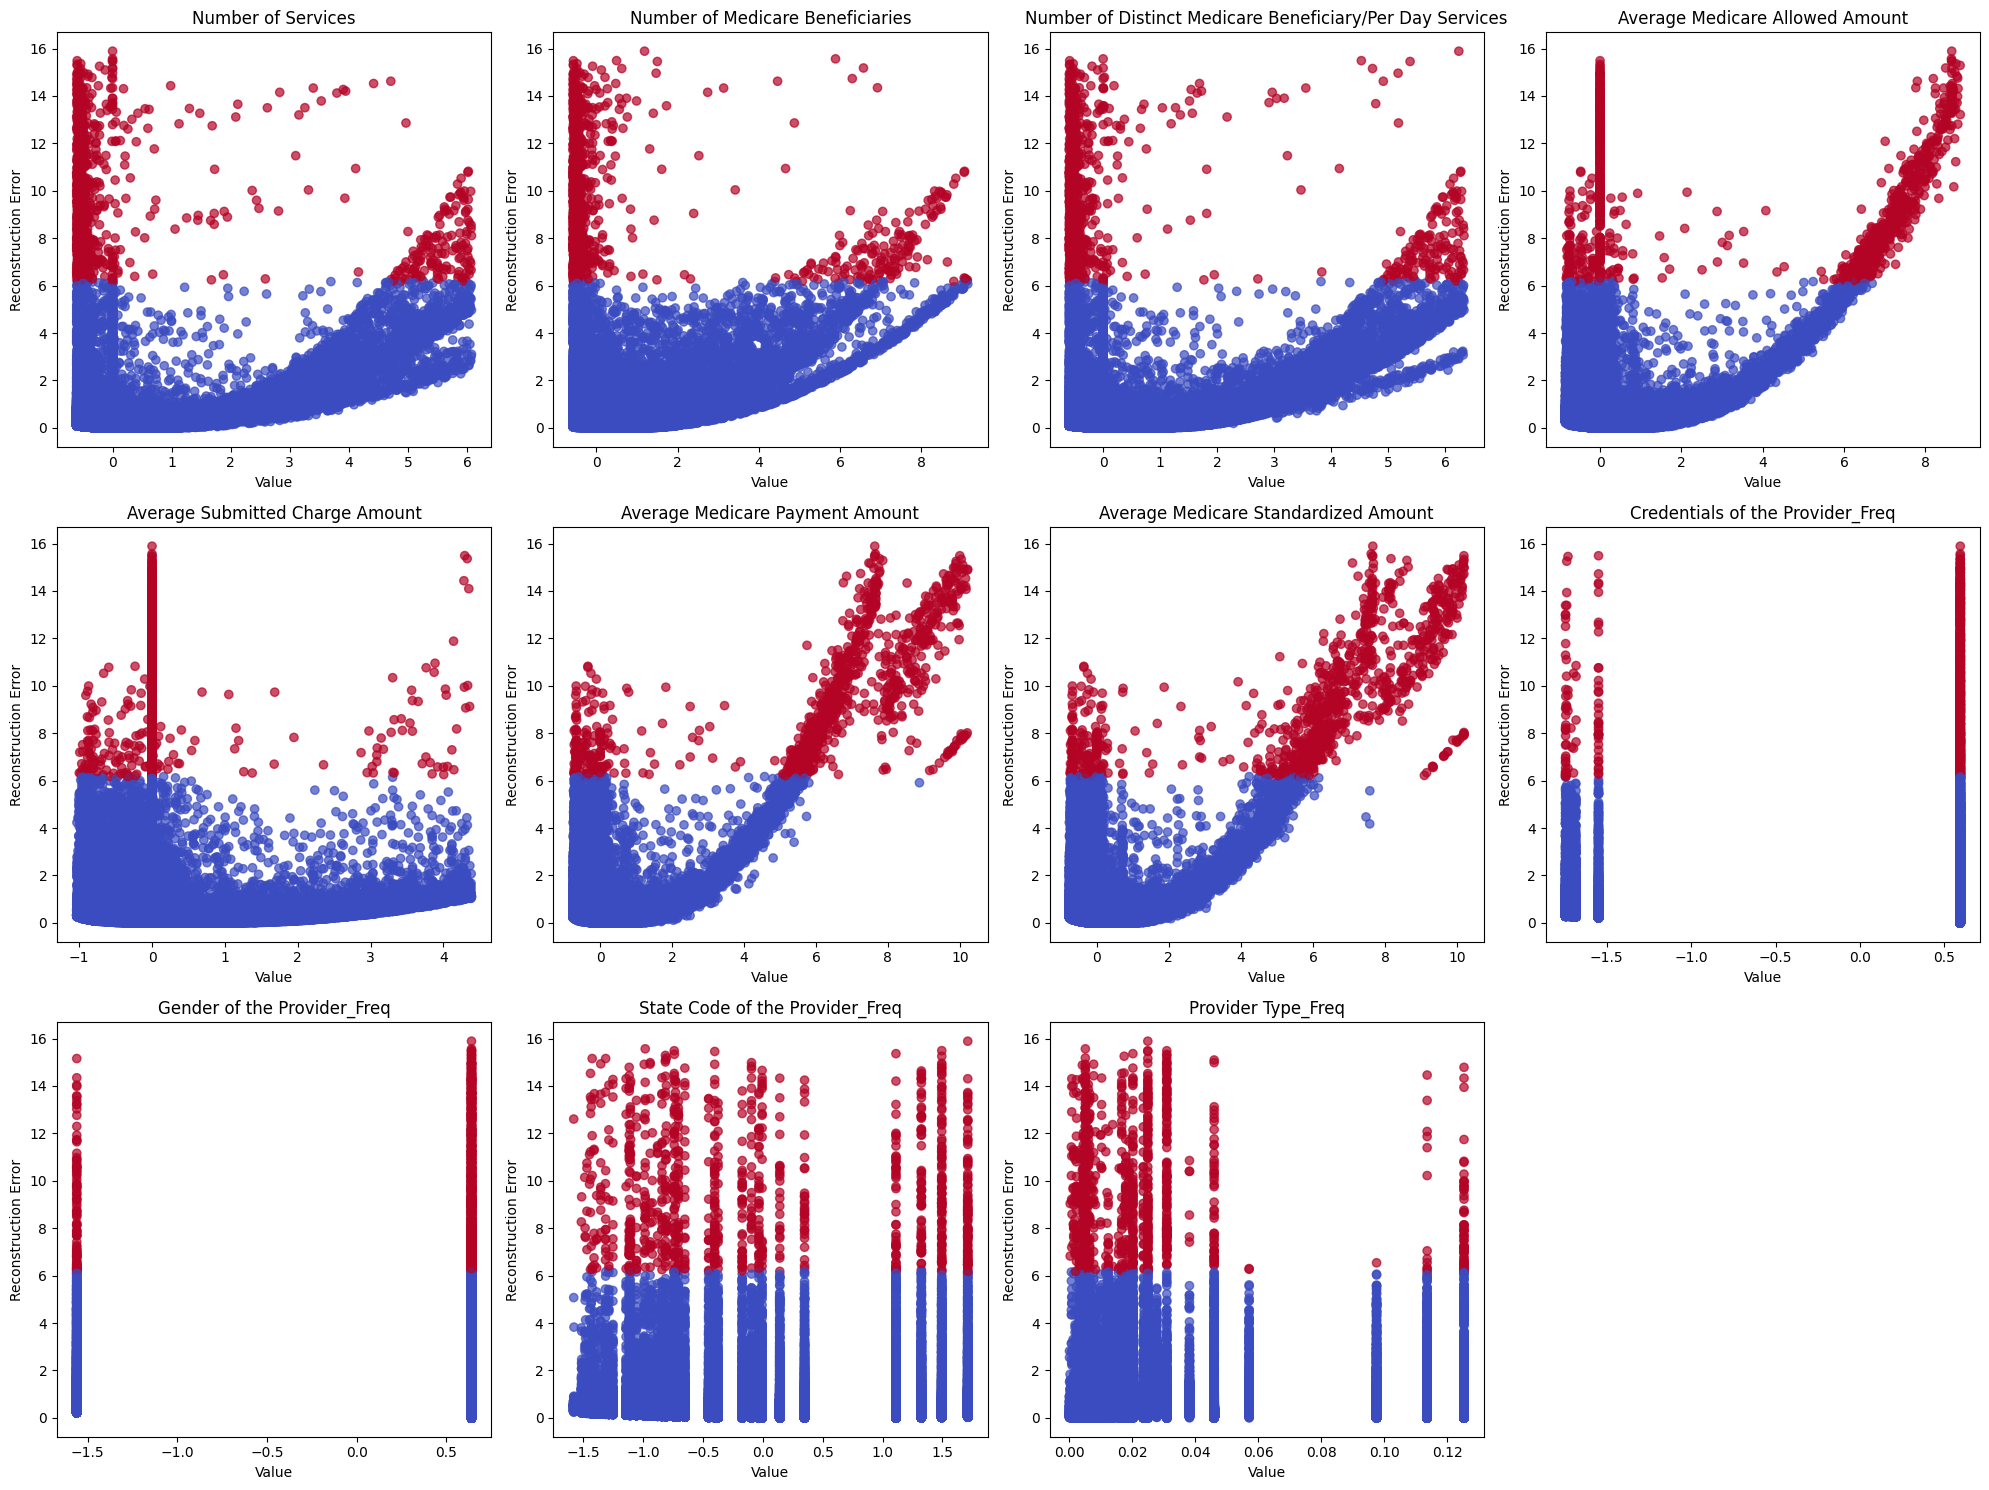

In [ ]:
# Scatter Plots of anomalies in each column 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], reconstruction_errors, c=anomalies, cmap='coolwarm', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Reconstruction Error')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

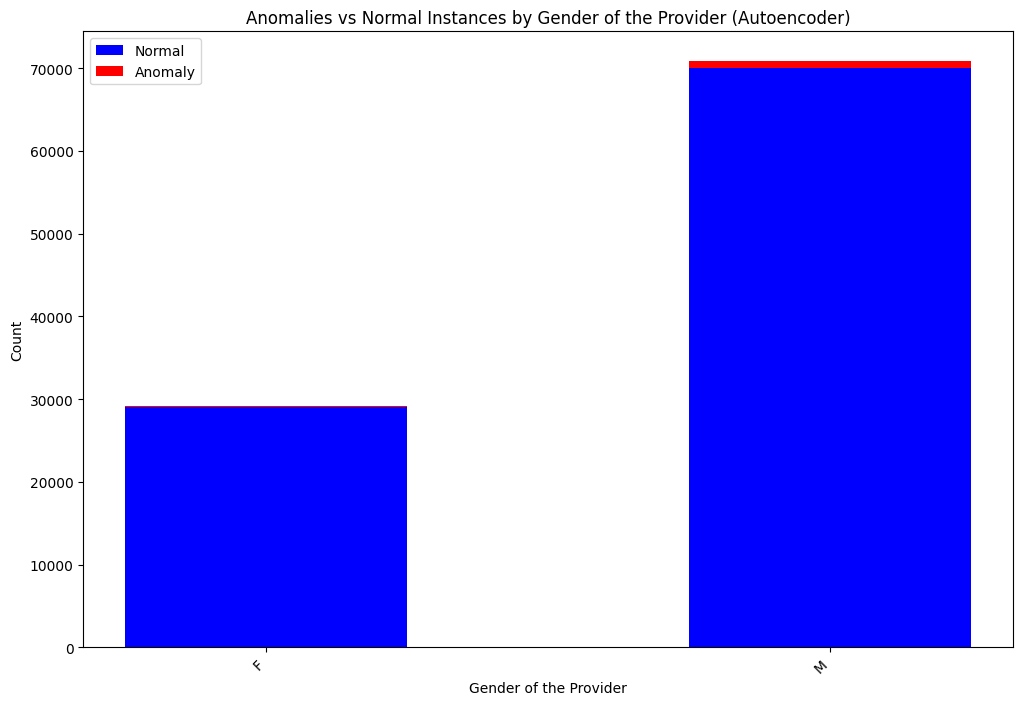

In [ ]:
original_gender_column = df['Gender of the Provider'].unique()
freq_encoded_gender_column = df['Gender of the Provider_Freq'].unique()

gender_mapping_dict = {}
for original_value in original_gender_column:
    freq_encoded_value = df.loc[df['Gender of the Provider'] == original_value, 'Gender of the Provider_Freq'].values[0]
    gender_mapping_dict[freq_encoded_value] = original_value


#Stacked Bar Plot for 'Gender of the Provider'
gender_grouped_autoencoder = data.groupby(['Gender of the Provider_Freq', 'Autoencoder_Anomaly']).size().unstack().fillna(0)
gender_grouped_autoencoder.columns = ['Normal', 'Anomaly'] if gender_grouped_autoencoder.shape[1] == 2 else (['Normal'] if 0 in gender_grouped_autoencoder.columns else ['Anomaly'])
gender_grouped_autoencoder = gender_grouped_autoencoder.reset_index()

# Mapping the frequency-encoded values back to the original values for labels
gender_grouped_autoencoder['Gender of the Provider'] = gender_grouped_autoencoder['Gender of the Provider_Freq'].map(gender_mapping_dict)

# Plot stacked bar plot for 'Gender of the Provider'
plt.figure(figsize=(12, 8))
bar_width = 0.5
bars1 = plt.bar(gender_grouped_autoencoder['Gender of the Provider'], gender_grouped_autoencoder['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(gender_grouped_autoencoder['Gender of the Provider'], gender_grouped_autoencoder['Anomaly'], bottom=gender_grouped_autoencoder['Normal'], color='red', label='Anomaly', width=bar_width)
plt.xlabel('Gender of the Provider')
plt.ylabel('Count')
plt.title('Anomalies vs Normal Instances by Gender of the Provider (Autoencoder)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<H2>We can see that more anamolies are present among Males than Females </H2>

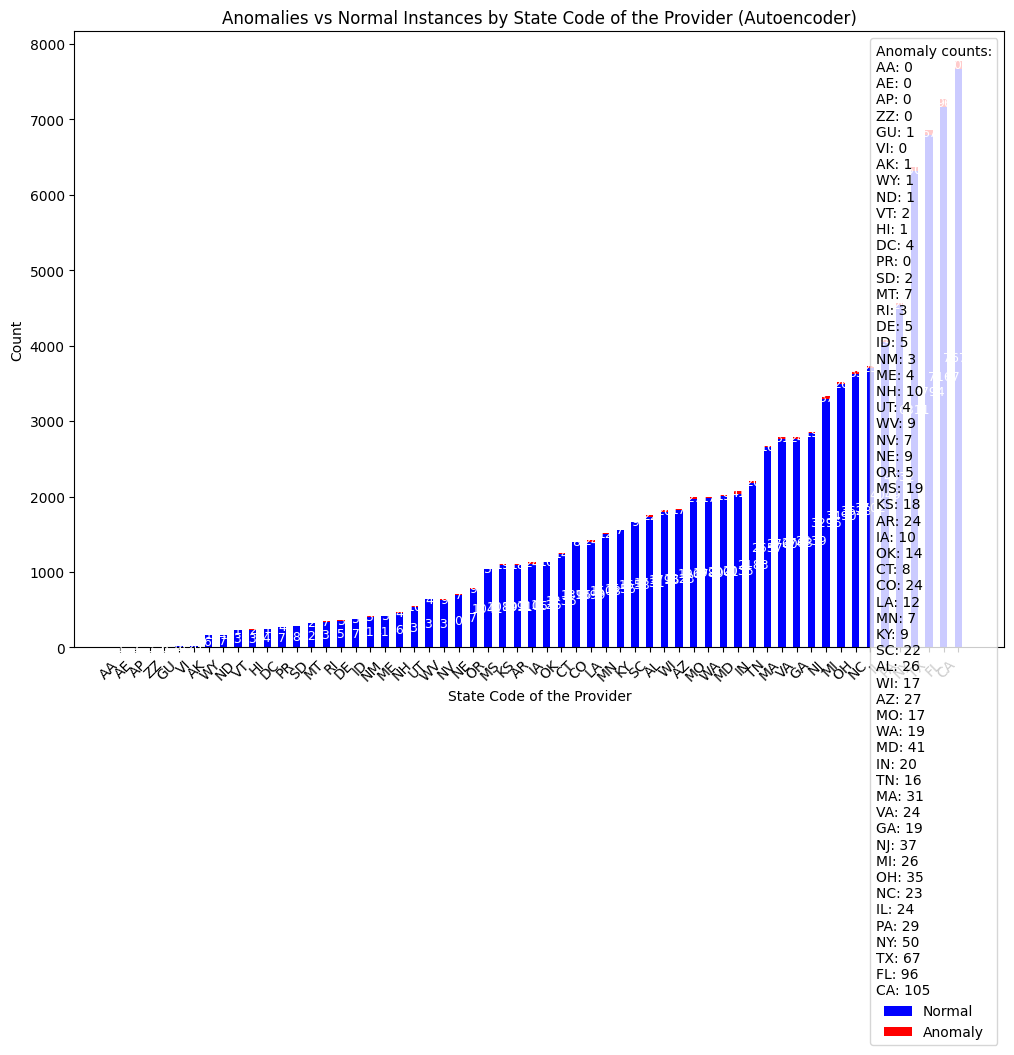

In [ ]:
# Mapping frequency-encoded values back to original values for State Code of the Provider
original_state_code_column = df['State Code of the Provider'].unique()
freq_encoded_state_code_column = df['State Code of the Provider_Freq'].unique()

state_code_mapping_dict = {}
for original_value in original_state_code_column:
    freq_encoded_value = df.loc[df['State Code of the Provider'] == original_value, 'State Code of the Provider_Freq'].values[0]
    state_code_mapping_dict[freq_encoded_value] = original_value

# Plot Stacked Bar Plot for 'State Code of the Provider_Freq'
state_code_grouped_autoencoder = data.groupby(['State Code of the Provider_Freq', 'Autoencoder_Anomaly']).size().unstack().fillna(0)
state_code_grouped_autoencoder.columns = ['Normal', 'Anomaly'] if state_code_grouped_autoencoder.shape[1] == 2 else (['Normal'] if 0 in state_code_grouped_autoencoder.columns else ['Anomaly'])
state_code_grouped_autoencoder = state_code_grouped_autoencoder.reset_index()

# Map the frequency-encoded values back to the original values for labels
state_code_grouped_autoencoder['State Code of the Provider'] = state_code_grouped_autoencoder['State Code of the Provider_Freq'].map(state_code_mapping_dict)

# Calculate total counts for each state code
state_code_grouped_autoencoder['Total'] = state_code_grouped_autoencoder['Normal'] + state_code_grouped_autoencoder['Anomaly']

# Plot stacked bar plot for 'State Code of the Provider'
plt.figure(figsize=(12, 8))
bar_width = 0.5
bars1 = plt.bar(state_code_grouped_autoencoder['State Code of the Provider'], state_code_grouped_autoencoder['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(state_code_grouped_autoencoder['State Code of the Provider'], state_code_grouped_autoencoder['Anomaly'], bottom=state_code_grouped_autoencoder['Normal'], color='red', label='Anomaly', width=bar_width)

# Annotate counts on the bars
for i in range(state_code_grouped_autoencoder.shape[0]):
    plt.text(i, state_code_grouped_autoencoder['Normal'][i] / 2, int(state_code_grouped_autoencoder['Normal'][i]), ha='center', va='center', color='white', fontsize=9)
    if state_code_grouped_autoencoder['Anomaly'][i] > 0:
        plt.text(i, state_code_grouped_autoencoder['Normal'][i] + state_code_grouped_autoencoder['Anomaly'][i] / 2, int(state_code_grouped_autoencoder['Anomaly'][i]), ha='center', va='center', color='white', fontsize=9)

plt.xlabel('State Code of the Provider')
plt.ylabel('Count')
plt.title('Anomalies vs Normal Instances by State Code of the Provider (Autoencoder)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', title=f'Anomaly counts:\n' + '\n'.join([f"{row['State Code of the Provider']}: {int(row['Anomaly'])}" for _, row in state_code_grouped_autoencoder.iterrows()]))
plt.show()


<h2>We can see that most anomolies occur in the 
    state of California - 105, followed by Florida- 96 and Texas- 67</h2>

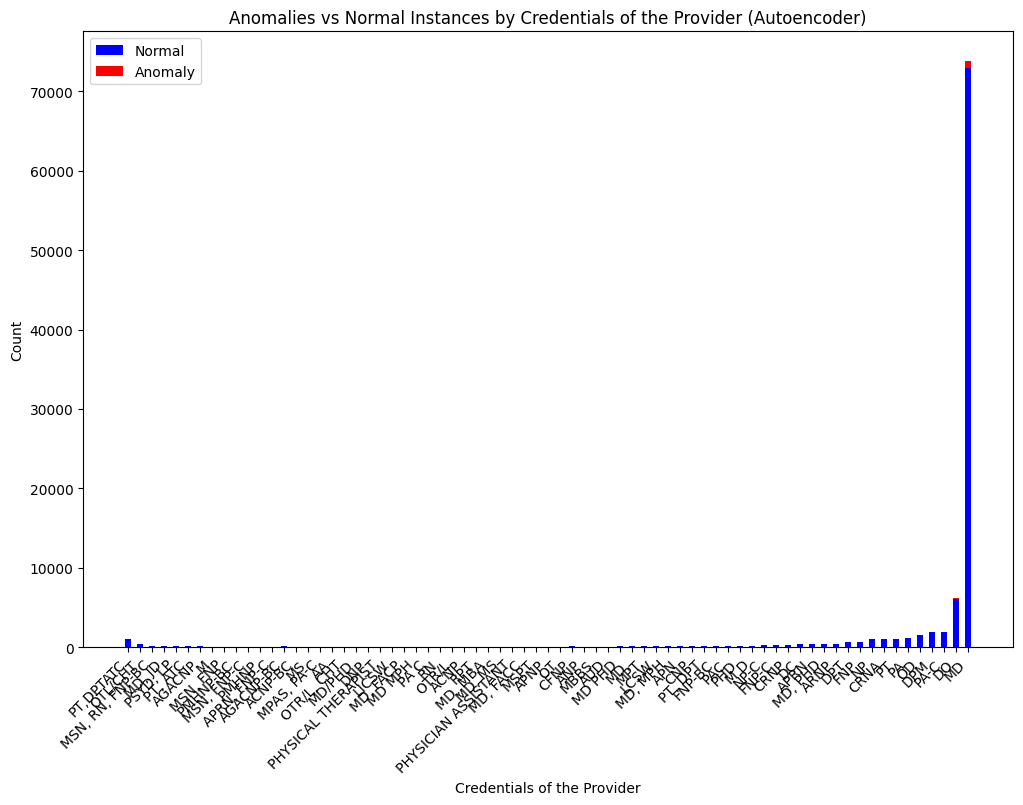

In [ ]:
original_credentials_column = df['Credentials of the Provider'].unique()
freq_encoded_credentials_column = df['Credentials of the Provider_Freq'].unique()

credentials_mapping_dict = {}
for original_value in original_credentials_column:
    freq_encoded_value = df.loc[df['Credentials of the Provider'] == original_value, 'Credentials of the Provider_Freq'].values[0]
    credentials_mapping_dict[freq_encoded_value] = original_value

credentials_grouped_autoencoder = data.groupby(['Credentials of the Provider_Freq', 'Autoencoder_Anomaly']).size().unstack().fillna(0)
credentials_grouped_autoencoder.columns = ['Normal', 'Anomaly'] if credentials_grouped_autoencoder.shape[1] == 2 else (['Normal'] if 0 in credentials_grouped_autoencoder.columns else ['Anomaly'])
credentials_grouped_autoencoder = credentials_grouped_autoencoder.reset_index()

# Mapping the frequency-encoded values back to the original values for labels
credentials_grouped_autoencoder['Credentials of the Provider'] = credentials_grouped_autoencoder['Credentials of the Provider_Freq'].map(credentials_mapping_dict)

# stacked bar plot for 'Credentials of the Provider'
plt.figure(figsize=(12, 8))
bar_width = 0.5
bars1 = plt.bar(credentials_grouped_autoencoder['Credentials of the Provider'], credentials_grouped_autoencoder['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(credentials_grouped_autoencoder['Credentials of the Provider'], credentials_grouped_autoencoder['Anomaly'], bottom=credentials_grouped_autoencoder['Normal'], color='red', label='Anomaly', width=bar_width)
plt.xlabel('Credentials of the Provider')
plt.ylabel('Count')
plt.title('Anomalies vs Normal Instances by Credentials of the Provider (Autoencoder)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<H2>We can see that most anamolies are present for credential MD, followed by DO </H2>

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get the reconstructed data from the autoencoder
X_reconstructed = autoencoder.predict(X_scaled)

# Calculate the reconstruction errors
reconstruction_errors = np.mean(np.abs(X_scaled - X_reconstructed), axis=1)

# Calculate RMSE for the entire dataset
rmse = np.sqrt(mean_squared_error(X_scaled, X_reconstructed))

# Calculate MAE for the entire dataset
mae = mean_absolute_error(X_scaled, X_reconstructed)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 723us/step
RMSE: 0.7414500698915072
MAE: 0.418245578281868


### Interpretation of Results

**Root Mean Squared Error (RMSE):**
- **Value:** 0.744
- **Interpretation:** The RMSE measures the average magnitude of reconstruction errors. An RMSE of 0.744 suggests a moderate level of error, so for our medical dataset of healthcare providers with 100,000 entries, this indicates a moderate reconstruction accuracy.

**Mean Absolute Error (MAE):**
- **Value:** 0.426
- **Interpretation:** The MAE measures the average absolute difference between the original and reconstructed data. An MAE of 0.426 indicates a moderate average error. This suggests the model's performance is fairly reasonable but may need improvement for critical applications.


In [ ]:
# Separate normal and anomaly data
normal_data = X_scaled[~anomalies]
anomaly_data = X_scaled[anomalies]

# Reconstruct the data
normal_data_reconstructed = autoencoder.predict(normal_data)
anomaly_data_reconstructed = autoencoder.predict(anomaly_data)

# Calculate MSE for normal and anomaly data
normal_mse = mean_squared_error(normal_data, normal_data_reconstructed)
anomaly_mse = mean_squared_error(anomaly_data, anomaly_data_reconstructed)

# Print the results
print(f"Normal Data MSE: {normal_mse}")
print(f"Anomaly Data MSE: {anomaly_mse}")


3094/3094 ━━━━━━━━━━━━━━━━━━━━ 2s 585us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
Normal Data MSE: 0.4584721832388032
Anomaly Data MSE: 9.586074473570477


### Interpretation of Results

**Normal Data MSE:**
- **Value:** 0.464
- **Interpretation:** The MSE for normal data is 0.464. This indicates a low average reconstruction error for the data points that are not considered anomalies. The autoencoder performs well on the normal data, accurately reconstructing the input data with minimal error.

**Anomaly Data MSE:**
- **Value:** 9.585
- **Interpretation:** The MSE for anomaly data is 9.585. This significantly higher value compared to the normal data MSE suggests that the autoencoder struggles to reconstruct the anomalous data points accurately. The high reconstruction error confirms the presence of anomalies, highlighting that these data points differ substantially from the normal data.